# 复习

上回说到向量，三角函数，笛卡儿坐标，极坐标，线性变换，变换矩阵，齐次矩阵，仿射变换，透视变换，点积，向量积。

向量是一个n元的tuple，在这里我们主要研究二维、三维向量。向量可以认为是一个点，也可以是一个原点出发,沿特定方向走特定长度的箭头（位移）。

向量可以相加，相减，数乘，相加认为是两个位移的叠加，或者一个点做特定位移；相减可以认为是两个点之间的位移；数乘可以认为是位移的缩放。

向量通常在笛卡儿坐标系中进行操作，但如果需要进行旋转操作，更适合在极坐标系下操作，极坐标系使用长度和角度去表示二维向量。

三角函数是关于直角三角形中对边、邻边、斜边长度比例关系的函数，三角函数入参是角度（编程语言是弧度），返回值是比例；还存在反三角函数，入参是比例，返回值是角度。反三角函数的返回值通常不是唯一的，所以额外提供atan2函数去接受y、x参数去唯一地确定角度。

对向量进行缩放，旋转，是线性变换；但加上平移后便是仿射变换，三维场景投影到二维画布上是透视变换。线性变换可以通过变换矩阵去表示，仿射变换要用矩阵表示需要增加一个维度去hold住增加的常量，这样增加一个维度的矩阵是原矩阵的齐次矩阵；齐次矩阵的维数足够描述透视变换。

向量的点积表示两个向量的“对齐程度”，向量的点积可以用来判断向量是否垂直，以及可以用于计算向量的夹角——$a \cdot b = |a||b| \cos \theta$。**点积可以被利用以将向量a投影到向量b的方向上**，假设投影后的向量为 $a'$，有 $|a'| = |a| \cos \theta = \frac{a \cdot b}{|b|}$，即 $a' = \frac{(a \cdot b)}{|b|} b$

向量积则表示两个向量的垂直程度——两向量垂直时向量积长度最大，相同方向或相反方向时长度为0；$|a \times b| = |a||b|\sin \theta$。向量积的大小等于两向量张成的平行四边形的面积，方向则是同时垂直于两向量（右手定则，食指指向第一个向量，中值指向第二个，此时大拇指是结果方向），因此向量积可以用于计算平面的法线。

向量积因为它的特性，在二维空间中没有意义，点积则是无关维数，普遍适用的。

# 关于向量积公式的推导

考虑不平行的两个三维向量 u 和 v，它们能够确定一个平面，假设这个平面的法向量 $n = (n_x, n_y, n_z)$，已知：

$$
n \cdot u = 0 \\
n \cdot v = 0
$$

即有：

$$
n_x u_x + n_y u_y + n_z u_z = 0 \\
n_x v_x + n_y v_y + n_z v_z = 0 
$$

考虑到法向量是可以有无数个的，它们方向一致，只是长度有参差，因此，能意识到，无论长度怎么改变，**不同分量的比值都是恒定的**，这里不妨直接规定 $n_x = -1$（后面才意识到这里实际上没必要规定……求比值的时候会直接把它化简掉），规定它不会改变法向量的方向，**从而不会改变法向量上任意分量的比值**，则有：

$$
n_y u_y + n_z u_z = u_x \\
n_y v_y + n_z v_z = v_x 
$$

设 $n_y = k n_z$，能得到 $k = \frac{u_x}{k u_y + u_z} = \frac{v_x}{k v_y + v_z}$，解得：

$$ k = n_y : n_z = (u_z v_x - u_x v_z) : (u_x v_y - u_y v_x )$$

这里得到的 $n_y:n_z$总是该比例，无论$n_x$如何变化。下面继续规定$n_z = -1$解得 $n_x:n_y$，总之结果为：

$$ n_x : n_y : n_z = (u_y v_z - u_z v_y) : (u_z v_x - u_x v_z) : (u_x v_y - u_y v_x)$$

这便让我们得到了向量积的方向，至于长度…………就这样了吧，根据$|n| = |u||v|\sin \theta$，应该能得到这里向量积的值本身就是这个比值的三个值，要证明这一点，公式太复杂了。



# for fun：二维画布渲染三维形状

实际上，目前所学的内容足够做3D渲染了——把一个三维形状渲染到二维画布上。

思路是，我们通过三角形去定义三维形状的各个面，然后计算它们的法线（定义去朝外，通过向量积）；然后定义“相机”——这里是**正交投影Orthogonal Projection**（实际上是平行投影），所以只需要一个向量（相机正对的方向）即可定义相机；然后根据相机视角和各个面的法线，便能够知道各个面是否可见（**不考虑遮挡**），再根据法线和光源方向（这里限定为平行光）的夹角，便能够计算面的亮度（同样不考虑遮挡）。

下面去绘制一个八面体——两个底面是正方形的四棱锥把底面怼到一起。先在三维中绘制出来：

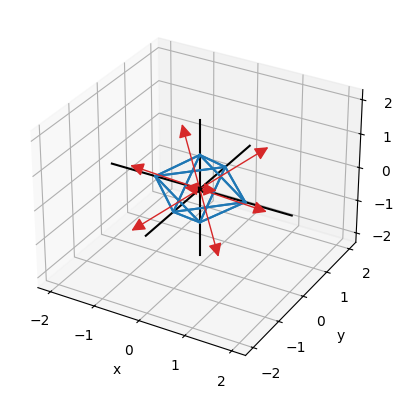

In [2]:
from vector_drawing import *
from vector_drawing import Polygon
from vectors import *
from draw3d import *
faces = [
    # 下面的面有意识地让 ab X ac 朝“外”
    # a         b          c
    [(0, 0, 1), (1, 0, 0), (0, 1, 0)],
    [(0, 0, 1), (0, -1, 0), (1, 0, 0)], 
    [(0, 0, 1), (-1, 0, 0), (0, -1, 0)],
    [(0, 0, 1), (0, 1, 0), (-1, 0, 0)],

    [(0, 0, -1), (0, 1, 0), (1, 0, 0)],
    [(0, 0, -1), (1, 0, 0), (0, -1, 0)],
    [(0, 0, -1), (0, -1, 0), (-1, 0, 0)],
    [(0, 0, -1), (-1, 0, 0), (0, 1, 0)],
]

def cross_product(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return uy*vz - vy*uz, uz*vx - vz*ux, ux*vy - uy*vx

def substract3d(u, v):
    return u[0] - v[0], u[1] - v[1], u[2] - v[2]



draw3d(
    *(Polygon3D(*face) for face in faces),
    *(Arrow3D(cross_product(substract3d(face[1], face[0]), substract3d(face[2], face[0]))) for face in faces)
)

现在的问题是，如何在二维画布中绘制出来它呢？一个最为简单的方式是——移除掉一个维度，比如z，只去处理x，y维度，实际上，这就是使用正交镜头从Z轴正方向垂直向下看时看到的东西。

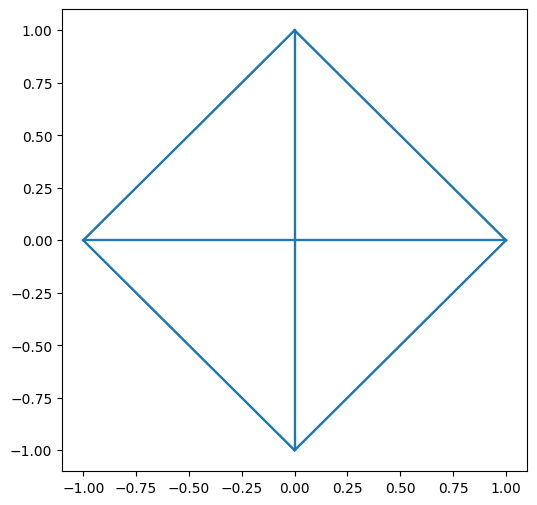

In [3]:
from vector_drawing import Polygon
draw(
    *[Polygon(*map(lambda x: x[:2], face)) for face in faces], axes=False, origin=False, grid=False
)

考虑其他方向呢？我们知道，**点积可以用于找到一个向量投影到另一个向量的方向时的长度**，考虑上面的抹掉Z维度，它实际上就是规定向量(1, 0, 0), (0, 1, 0)，然后求得向量投影到这两个向量上时的长度，以它们作为新的x，y坐标。比如，对向量(x, y, z)，它的投影的长度分别为：

$$
(\frac{(x, y, z) \cdot (1, 0, 0)}{|(1, 0, 0)|}, \frac{(x, y, z) \cdot (0, 1, 0)}{|(0, 1, 0)|}) = (x, y)
$$

使用代码进行表示，以及换个角度去看：

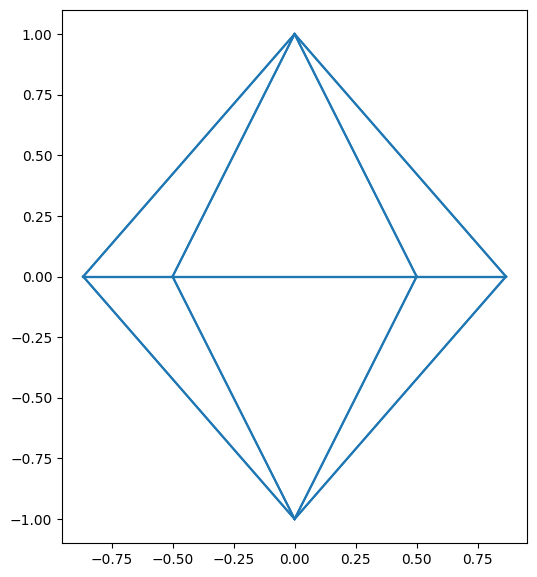

In [4]:
def dot(u, v) -> float:
    return sum((i[0] * i[1] for i in zip(u, v)))
def length3d(v):
    return sqrt(v[0]**2 + v[1]**2 + v[2]**2)

def component(v, direction):
    return dot(v, direction) / length3d(direction) 
def vec_to_2d(dir_x, dir_y, v):
    return component(v, dir_x), component(v, dir_y)

from functools import partial
# 尝试从另一个角度去看呢？比如，我从y轴负方向向正方向去看，同时视角水平左偏30度，这时候两个向量是(sqrt(3), 1, 0), (0, 0, 1)

dir_x, dir_y = (sqrt(3), 1, 0), (0, 0, 1)

vec_to_xy = partial(vec_to_2d, dir_x, dir_y)
draw(
    *[Polygon(*map(vec_to_xy, face)) for face in faces], axes=False, origin=False, grid=False
)

似乎有点眉目了，现在另一个问题是，我们是看不到**背后**的面的，这里应当筛掉。如何判断面是不是背后的？只需要检查面的法线和当前镜头的法线（朝画面内）是否反向即可，而检查反向则只需要检查点积是否小于0，小于0则显示这个面，否则不显示。

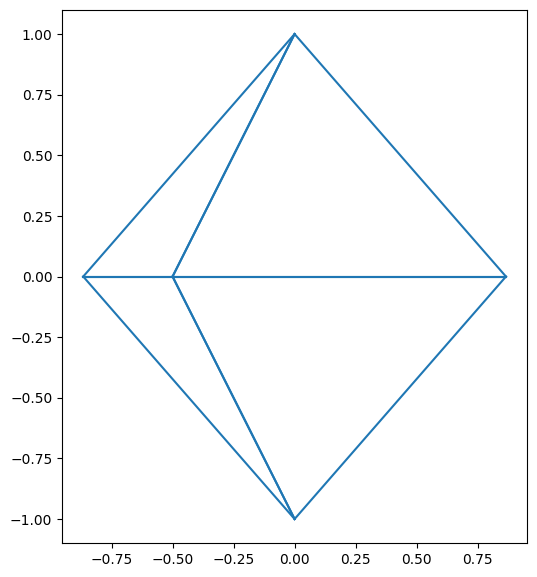

In [5]:
displayed_faces = []
normal_camera = cross_product(dir_y, dir_x)

for a, b, c in faces:
    ab = substract3d(b, a)
    ac = substract3d(c, a)
    normal = cross_product(ab, ac)
    if dot(normal, normal_camera) < 0:
        displayed_faces.append((a, b, c))


draw(
    *[Polygon(*map(vec_to_xy, face)) for face in displayed_faces], axes=False, origin=False, grid=False
)

显然，这判断法是有疏漏的——如果物体不是这样的凸多边形，比如在背后又出现向镜头的面，它仍会被看到，但是再深入下去就是计算机图形学的内容了，这里不表。

能把面显示出来，现在该计算面的亮度然后真正地进行渲染了。这里也是采用同样的方式——规定光线的方向，对可见的面，检查面的法线和光线的夹角，夹角越小，则越亮。这里同样不考虑遮蔽，所以直接看夹角就行了。我们可以直接把光线向量、法线向量均归一化，然后求它们的点积即可。当点积大于0，小于1的时候，证明在迎光面，将点积映射到亮度；否则是背光面，亮度为0

247
172
97
21
[<vector_drawing.Polygon object at 0x00000135218A3B00>, <vector_drawing.Polygon object at 0x00000135218A35F0>, <vector_drawing.Polygon object at 0x000001357EDBDB20>, <vector_drawing.Polygon object at 0x000001351F5F7110>]


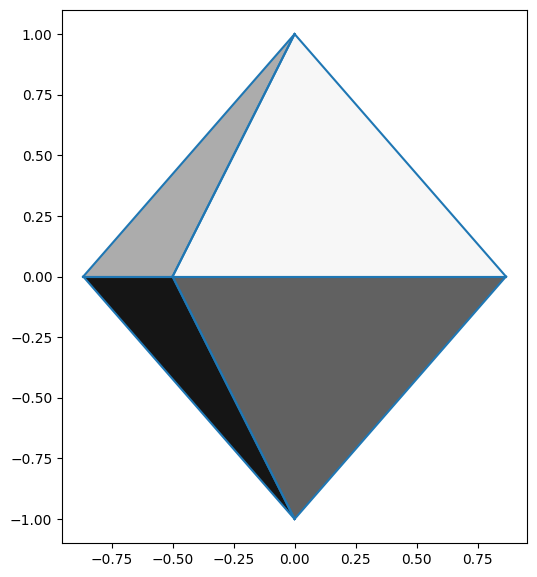

In [6]:
from matplotlib import colormaps
from matplotlib.cm import get_cmap
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1], scalar * v[2])

def unit(v):
    """归一化"""
    return scale(1/length3d(v), v)

polygons = []
normal_camera = cross_product(dir_y, dir_x)

# 光线方向
light = scale(-1, unit((1, 3.2, 2)))

for a, b, c in faces:
    ab = substract3d(b, a)
    ac = substract3d(c, a)
    normal = unit(cross_product(ab, ac))
    if dot(normal, normal_camera) >= 0:
        continue
    lightness = 1 - max(0, dot(normal, light))
    lightness = round(lightness * 255)
    print(lightness)
    polygons.append(Polygon(*(map(vec_to_xy, [a, b, c])), fill=f'#{lightness:02x}{lightness:02x}{lightness:02x}', alpha=1))

print(repr(polygons))
draw(
    *polygons, axes=False, origin=False, grid=False
)

OK，玩儿结束了，继续下一章（这中间我卡了半个月了，妈的）。下面学习一下numpy，后面不再使用普通的数组去表示向量了。

# numpy 入门

numpy提供了强大的多维数组的实现用于进行向量、矩阵运算。numpy有一个所谓的广播机制，它会自动扩展左右操作数，以保证能够进行运算，比如`3 + np.array([1, 2, 3])`，等价于`np.array([3, 3, 3]) + array([1, 2, 3])`。

numpy对向量和对矩阵的看法是不同的——向量是一维的，如`np.array([1,2,3])`，矩阵是二维的，如`np.array([[1, 2, 3]])`。点积、矩阵乘法均使用`@`去表示，下表展示了`@`的行为，下面定义了rotate函数去旋转一个二维向量。

|左操作数|右操作数|描述|结果|
|:-|:-|:-|:-|
|向量|向量|点积|标量|
|向量|矩阵|矩阵乘法，向量被当作行向量看待|矩阵|
|矩阵|向量|矩阵乘法，向量被当作列向量看待|向量|
|矩阵|矩阵|矩阵乘法|矩阵|

$$
rotate(\theta, \begin{bmatrix}
x' \\
y'
\end{bmatrix})
= \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix} 
\begin{bmatrix}
x \\
y
\end{bmatrix}$$


In [7]:
import numpy as np

u = np.array([1, 2, 3])
v = np.array([2, 3, 4])
p = print
p(u + v) # 向量加法
p(u - v) # 向量减法
p(3 * u) # 向量数乘（广播）
p(u @ v) # 向量点积
# 证明：
p(u @ v.reshape(-1, 1)) # 矩阵乘法，u当作行向量

p(np.cross(u, v)) # 向量外积（向量积）

p(np.linalg.norm(u)) # 长度
p(u / np.linalg.norm(u)) # 归一化（即得到unit——向量的单位向量）
p(np.array([1,2,3]) @ np.array([[1], [2], [3]])) # [14]
def rotate(theta, vec):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ]) @ vec

print(rotate(np.radians(45), [np.sqrt(2), 0]))  # 1, 1


[3 5 7]
[-1 -1 -1]
[3 6 9]
20
[20]
[-1  2 -1]
3.7416573867739413
[0.26726124 0.53452248 0.80178373]
[14]
[1. 1.]


对一个值的集合（无论它的组织形式是向量还是矩阵还是其他），许多操作都可以归结到map-filter-reduce（当然，这些只是基础的）。

## map 操作

map操作不改变集合的形状，而是对集合中的每一个元素做**同一个操作**并得到结果。大部分会被广播的操作均属于map操作。

numpy提供了诸多数学函数，如sin，sqrt，各种操作符等，它们都支持对标量和多维数组逐元素做操作。numpy同时支持把自定义的函数变为广播函数。

In [8]:
import numpy as np

mat = np.array([[1,2,3], [2,3,4]])
p(mat > 1) 
p(np.sqrt(2)) # 标量也行，得到标量
p(mat % 2 == 0) # True表示为偶数的“位”

p(np.sin(mat + 2) + 1) # 由于广播特性，可以使用更复杂的表达式，得到相同形状
# 但并非所有适用于标量的表达式都可用，比如想表达一个三目——比如把所有偶数乘2：x * 2 if x % 2 == 0 else x
# p(mat * 2 if mat % 2 == 0 else mat) # 这显然就是不正确的——这实际上是对每个元素做了不同操作
# 解决方案是自定义函数去处理它

def double_even(x):
    print(x) # 检查它执行多少次，实际上会对每个元素执行一次
    return x * 2 if x % 2 == 0 else x

# 将它矢量化，因而支持广播
double_even = np.vectorize(double_even)

p(double_even(mat))

# 实际上，广播不止是把标量转换成数组，广播也可以用于数组升维，下面证明它：
p(np.array([100, 200, 300]) + mat)

[[False  True  True]
 [ True  True  True]]
1.4142135623730951
[[False  True False]
 [ True False  True]]
[[1.14112001 0.2431975  0.04107573]
 [0.2431975  0.04107573 0.7205845 ]]
1
1
2
3
2
3
4
[[1 4 3]
 [4 3 8]]
[[101 202 303]
 [102 203 304]]


## filter 操作

上面说到map操作，不改变形状，但改变值，numpy的filter操作不太典型——它**把多维数组展平成一维数组并进行筛选**。为什么filter操作要如此行为呢？猜测是因为numpy中各维的大小是固定的，而filter会导致最后一维的大小发生改变，导致大小不一致。

numpy的filter通过**布尔掩码**（bool mask，有趣的是图层蒙版也是这个mask）进行——布尔掩码是一个布尔值的，形状和该数组相同的数组；布尔掩码通过索引的方式去应用，筛选出True的部分的元素。

In [9]:
mat = np.array([[0,0,0,0], [1,1,1,1], [2,2,2,2], [3,3,3,3]])

# 下面几个不是filter操作，它们返回的都可以不是一维数组，但是可以作为启发
p(mat[ [1, 3] ]) # 通过一个索引的列表可以获取指定下标的元素组成数组
p(mat[0:2]) # 数组切片
p(mat[ [True,False,True,False] ]) # 同 mat [ [0, 2] ]

# 下面的则是filter操作
p(mat[mat > 2]) # 返回所有大于2的元素，以一维数组的形式
def is_odd(x):
    return x % 2 == 1 # 这个不用向量化，它的形式观察能发现能适用于np数组
p(mat[is_odd(mat)]) # 返回所有大于2的元素，以一维数组的形式

[[1 1 1 1]
 [3 3 3 3]]
[[0 0 0 0]
 [1 1 1 1]]
[[0 0 0 0]
 [2 2 2 2]]
[3 3 3 3]
[1 1 1 1 3 3 3 3]


## reduce 操作

reduce操作则是那种降维的操作——将某一维度或多个维度的值进行聚合，使得维度降低。numpy提供了sum，prod等reduce操作，其中能够指定操作的维度。这里的实际做的操作需要好好思考思考。

In [10]:
mat = np.array([
    [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
    [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]],
    [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
    [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]],
])
p(mat.shape) # (4, 3, 4)，表示第一维有4个元素，第二维有3个元素，第三维4个
p(np.sum(mat)) # 600
p(np.sum(mat, axis=0).shape) # (3, 4)
p(np.sum(mat, axis=1).shape) # (4, 4)
p(np.sum(mat, axis=2).shape) # (4, 3)
p(np.sum(mat, axis=(0, 1)).shape) # (4,) 

(4, 3, 4)
600
(3, 4)
(4, 4)
(4, 3)
(4,)


比如，axis为0时，根据结果的shape，我们能发现，numpy是把第一维给去掉了，怎么去掉呢？我们把内层数组当成黑箱的话，mat就是有4个元素的数组，其中，每个元素的shape是(3, 4)，我们把这4个`(3, 4)`进行聚合，得到一个`(3, 4)`，把它作为操作的返回值。

显然——要聚合这4个`(3, 4)`，**又保证结果的形状同样是`(3, 4)`不变**，这里最直接的方式就是将它们**逐元素**去聚合，这是容易理解的。因此我们能注意到，**要聚合第一维，需要操作第一维及其后面的所有维度**。

再比如，axis为1时，根据结果的shape，能发现是把第二维去掉了，怎么去掉呢？我们注意到第一维的形状不变，所以我们是对每个第一维的元素去进行研究，对每个第一维的元素，我们注意到它的形状是`(3, 4)`，而我们要做的就是对这个`(3, 4)`做axis=0时的操作，得到一个`(4,)`，并将它替代为原来的第一维的元素。注意到，要聚合第n维，需要操作n及其后面的所有维度。

换种说法是，axis=0就是对第一维reduce，axis=1就是对第一维map，对第二维reduce……实际执行计算的，总是被reduce及其之后的维度。

此外，折叠也可以同时折叠多维，这就相当于先后做多次sum，不表。这里维数也可以填负数，表示从后往前数维数，-1表示最后一维。

先不考虑这么复杂的（等用到的时候再细细思考，等有实践经验后再进一步找到合适的表述），先只考虑矩阵，容易发现，axis=0时，每一列的元素被聚合了，axis=1时，每一行被聚合了。

In [11]:
mat = np.array([
    [1, 2, 3, 4],
    [2, 3, 4, 5]
])
p(np.sum(mat, axis=0)) # [3, 5, 7, 9]
p(np.sum(mat, axis=1)) # [10, 14]

[3 5 7 9]
[10 14]


## 维度操作

numpy可以：

1. 增加、减少维度（`newaxis`, `squeeze`）
2. 控制元素数量调整形状，或者直接调整形状，或者广播为形状（`reshape`，`resize`，`broadcast_to`，**注意`resize`不纯**！）
3. 调整维度顺序（如转置）（`T`，`transpose`）
4. 获取子形状（如获取矩阵的某一列）（使用索引语法，**它似乎无法实现获取矩阵每一列这种操作**）
5. 展平数组（`flatten`——拷贝并展平，`ravel`——返回展平的视图），交换轴（`swapaxes`），合并（`concatenate`，`hstack`，`vstack`）、拆分（`split`，`hsplit`，`vsplit`）数组等

其中，减少维度的话只能减少大小为1的维度——这是可以理解的，扔掉任何一维都会导致所有元素没有掉。

In [12]:
######## 增加维度使用 np.newaxis，它的使用方式很奇特，但符合逻辑：
vec = np.array([1, 2, 3])
p(vec.shape) # (3,)
p(vec[np.newaxis, :]) # [[1, 2, 3]] ，shape=(1, 3)
# 等价于
p(np.expand_dims(vec, axis=0)) 

####### squeeze函数能够移除掉所有大小为1的维度
vec = vec[np.newaxis, np.newaxis, :]
p(vec.squeeze()) # [1, 2, 3]
p(vec) # [[[1, 2, 3]]]  注意到squeeze函数是纯的，实际上大部分操作都是纯的

mat = np.array([
    [1, 2, 3],
    [2, 3, 4]
])

####### reshape函数保持元素数量不变，修改形状，值为-1的时候表示计算出大小
p(mat.reshape(-1)) # [1, 2, 3, 2, 3, 4]
p(mat.reshape(3, -1)) # [[1, 2], [3, 2], [3, 4]]

####### resize函数直接修改形状，没有的就用这个数组类型的零值去填充
# 注意——resize不纯！
m = mat.copy()
m.resize(5, 3) # [ [1, 2, 3], [2, 3, 4], [0, 0, 0], ... ]
p(m)

###### broadcast_to生成广播形状

arr = np.array([1, 2, 3])
broadcasted = np.broadcast_to(arr, (3, 3))
p(broadcasted) # [ [1, 2, 3], [1, 2, 3], [1, 2, 3] ]

###### transpose方法可以转置，无论是二维还是高维数组，能任意指定维度的顺序
mat = np.array([ 
    [[1, 2, 3], [2, 3, 4]], 
    [[1, 2, 3], [2, 3, 4]], 
])
p(mat.shape, mat.transpose().shape) # (2, 2, 3) (3, 2, 2)
p(mat.transpose(0, 2, 1).shape) # (2, 3, 2)

# .T属性则是更简单的方式
p(mat.T.shape) # (3, 2, 2)


(3,)
[[1 2 3]]
[[1 2 3]]
[1 2 3]
[[[1 2 3]]]
[1 2 3 2 3 4]
[[1 2]
 [3 2]
 [3 4]]
[[1 2 3]
 [2 3 4]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
(2, 2, 3) (3, 2, 2)
(2, 3, 2)
(3, 2, 2)


### 使用索引语法获取子形状

关于获取子形状，使用索引语法去做处理，比如对三维数组mat，`mat[:, :, 1]`，可以这么读：对mat的第一维的每一个元素，对mat的第二维的每一个元素，取它的下标为1的元素，因此这时候结果为二维数组。

而对`mat[:, 1]`，就是对mat的第一维的每一个元素，取下标为1的元素，这时候结果为二维数组。

而对`mat[:, 1, 1]`，就是对mat的第一维的每一个元素，取下标为1的元素的下标为1的元素，这时候结果是一维数组。

而对`mat[:]`，就是取mat的第一维的每一个元素，结果就是mat本身。

容易发现：`mat[:] == mat[:,:] == mat[:,:,:]`，`mat[1, 2] == mat[1][2]`，`mat[1, :] == mat[1] == mat[1][:]`

In [13]:
mat = np.array([ 
    [[1, 2, 3], [2, 3, 4]], 
    [[1, 2, 3], [2, 3, 4]], 
])
p(mat[:,:,1]) # [[2, 3], [2, 3]]
p(mat[:,1,1]) # [[2, 3], [2, 3]]
p(mat[:, 1]) # [[2, 3, 4], [2, 3, 4]]

# 如何获取矩阵的第一列？mat[:, 0]
mat = np.array([
    [1, 2, 3], 
    [2, 3, 4]
])
p(mat[:, 0]) # [1, 2]

# 至于每一列……哈哈，只能转置了

###### 然后是展平，展平有ravel和flatten，它们的区别是flatten会拷贝数组，ravel返回的是视图
mat = np.array([
    [1, 2, 3], 
    [2, 3, 4]
])
flat = mat.flatten()
flat[0] = 100
p(mat) # 不变
mat.ravel()[0] = 100
p(mat) # 变

###### 轴的交换

p(mat.swapaxes(1, 0)) # 仅调整两个轴的顺序，transpose是调整所有轴的

[[2 3]
 [2 3]]
[3 3]
[[2 3 4]
 [2 3 4]]
[1 2]
[[1 2 3]
 [2 3 4]]
[[100   2   3]
 [  2   3   4]]
[[100   2]
 [  2   3]
 [  3   4]]


### 合并、拆分数组

numpy支持合并、拆分数组，其中引入了水平、垂直方向合并、拆分的说法。以矩阵作为心智模型的话，**垂直方向就是操作第一维，水平方向就是操作最后一维**。

`concatenate`是一般的合并，支持按任意轴合并，`hstack`就是水平合并，`vstack`就是垂直合并。

`split`是一般的拆分，支持按任意轴的任意位置拆分，`hsplit`就是水平拆分，`vsplit`就是垂直拆分。

`split`要传参决定如何切分数组；传一个数字N时，将数组沿特定轴去**均等拆分成N份**，无法拆分则报错；也可以传一个数组，代表拆分的边界（前闭后开），比如传`[1, 3, 5]`，此时会切成4份，分别为`arr[:1], arr[1:3], arr[3:5], arr[5:]`，其中允许出现空数组。

同时注意，split的返回值是python列表类型而非np数组类型，这……也对。

In [14]:
a = np.array([
    [1, 2, 3],
    [2, 3, 4],
])
b = np.array([
    [1, 2, 3],
    [2, 3, 4],
])

p(np.vstack([a, b])) # [ [1, 2, 3], [2, 3, 4],  [1, 2, 3], [2, 3, 4] ]
p(np.hstack([a, b])) # [ [1, 2, 3, 2, 3, 4], [1, 2, 3, 2, 3, 4] ]

p(np.hsplit(a, [1,2,3,4,5]))

[[1 2 3]
 [2 3 4]
 [1 2 3]
 [2 3 4]]
[[1 2 3 1 2 3]
 [2 3 4 2 3 4]]
[array([[1],
       [2]]), array([[2],
       [3]]), array([[3],
       [4]]), array([], shape=(2, 0), dtype=int64), array([], shape=(2, 0), dtype=int64), array([], shape=(2, 0), dtype=int64)]


算是以自己的步调过了一下，后面跟着numpy的官方文档的[beginner's guide](https://numpy.org/doc/stable/user/absolute_beginners.html)查漏补缺一下。但更多的……等学线代实际用到的时候再说。

## 数组的创建

`array`从嵌套python列表生成数组。**注意数组是有类型的**，如果要创建浮点数数组，至少任意一个元素要写成浮点数。

`zeros`，`ones`方法生成指定形状的全为0、1的数组。`empty`创建未初始化的数组，性能最高。此外还有之前了解过的`arange`，`linspace`。除了`arange`（在所有参数都是int时），其他返回的都是浮点数数组。

`full`则是使用指定值去生成数组。

此外还有`random`，生成特定形状的0-1之间的随机数的数组。

另一个常用的方法则是构造一个特定长度的一维数组，然后reshape到需要的形状。

## 数组判等

`array_equal`方法检查两个数组是否相等，但不会区分数据类型的细微差异如`int32`和`int64`。

`np.all(a == b)`也可用于判等，但要注意避免广播。

`np.allclose`则用于浮点数的比较，可以处理**近似相等**。

`np.testing.assert_array_equal` **断言**两个数组完全相等，其是断言，但能提供详细错误信息。